# Bathymetry basics

This notebook demonstrates the core functionality of the `Bathymetry` class for loading, analsing, and visualising bathymetric data.

In [1]:
from bathy import Bathymetry

## Downloading data from GEBCO OPeNDAP

You can download data directly from the GEBCO OPeNDAP server without downloading the entire dataset. This is useful for exploring different regions without storing large files locally.

In [2]:
# # Download a region from GEBCO OPeNDAP server
# # Only downloads the specified lat/lon region, not the entire dataset
# bath_download = Bathymetry.from_gebco_opendap(
#     lon_range=(-10, -9.9),
#     lat_range=(54.9, 55),
#     save_path='../data/north_sea_subset.nc'  # Optional: save to file
# )

# print(bath_download)
# print(f"Downloaded shape: {bath_download.shape}")

In [3]:
# Load with geographic bounds
bath = Bathymetry("../data/gebco_2025_cut.nc")

print(bath)
print(f"Shape: {bath.shape}")
print(f"Longitude range: {bath.lon_range}")
print(f"Latitude range: {bath.lat_range}")

Bathymetry(shape=(838, 1645), lon=[-12.08, -5.23], lat=[46.05, 49.54])
Shape: (838, 1645)
Longitude range: (-12.081250000000011, -5.231249999999989)
Latitude range: (46.05208333333334, 49.539583333333326)


In [4]:
# Land/sea coverage
coverage = bath.coverage()
coverage

metric,value
str,f64
"""total_cells""",1.37851e6
"""underwater_cells""",1.37851e6
"""land_cells""",0.0
"""underwater_pct""",100.0
"""land_pct""",0.0


## Visualisation

Create various visualisations of the bathymetry data.

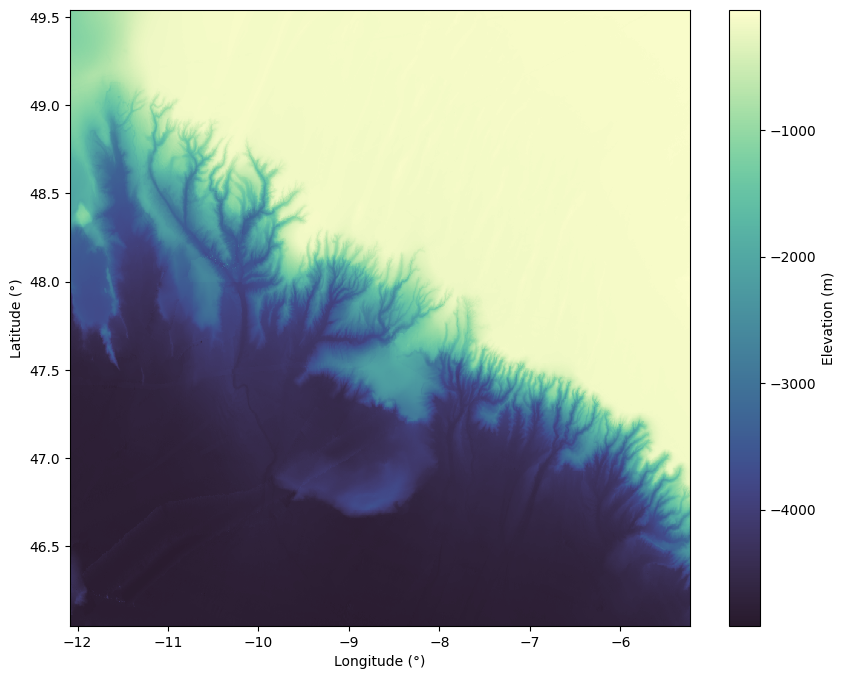

In [5]:
# Simple elevation plot
bath.plot_bathy()

### Adding contours

All plot methods support an optional `contours` parameter to overlay bathymetric contour lines.

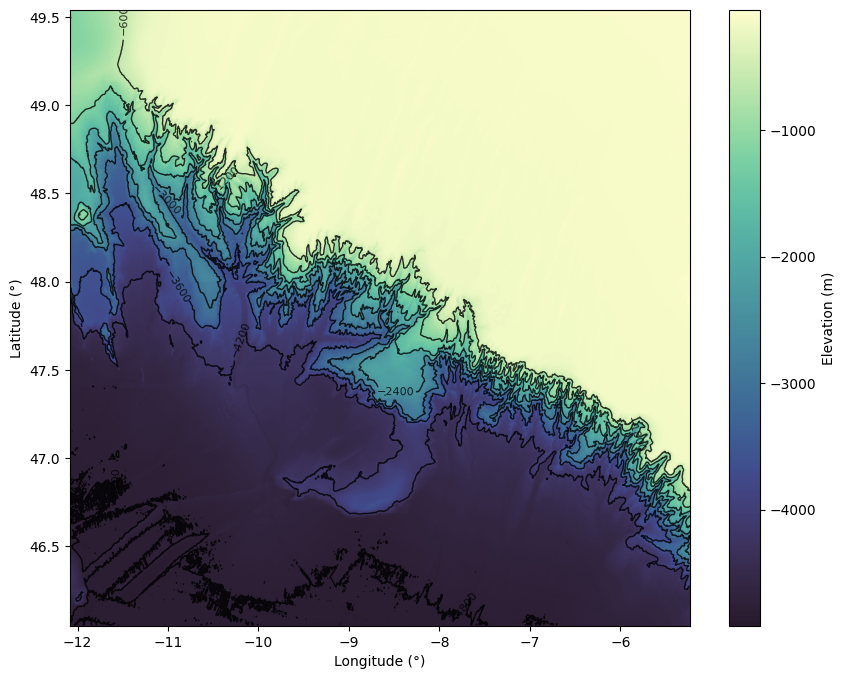

In [6]:
# Simple plot with 10 evenly-spaced contour levels
bath.plot_bathy(contours=10)

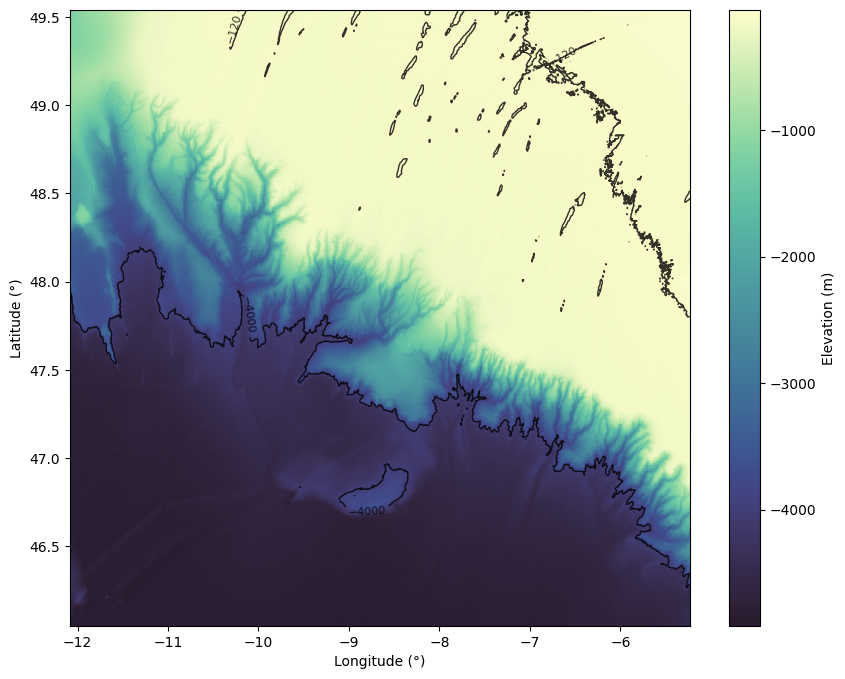

In [7]:
# Hillshade with specific depth contours (shelf edge, slope, abyssal depths)
bath.plot_bathy(contours=[-120, -4000])

### Other visualizations

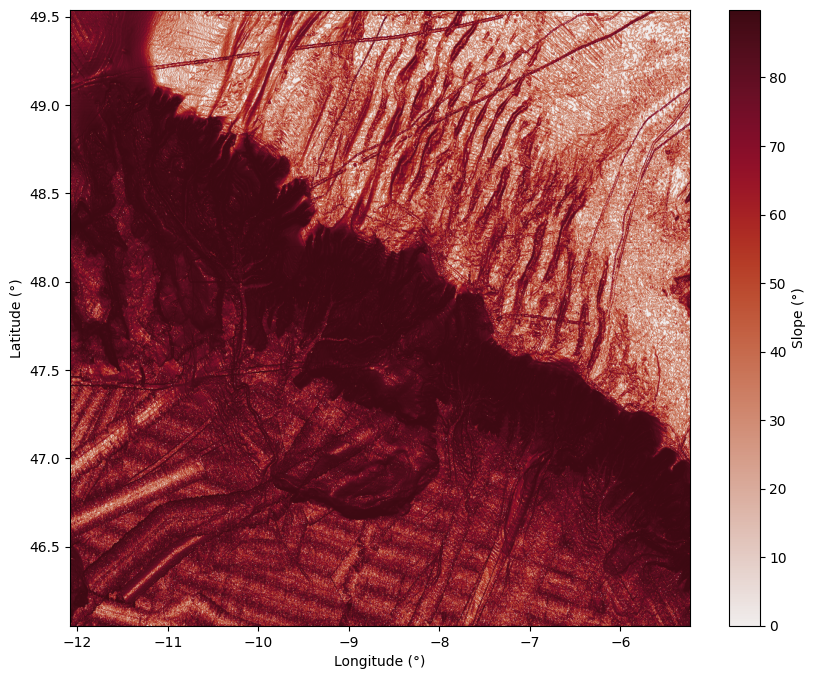

In [8]:
# Seafloor slope
bath.plot_slope()

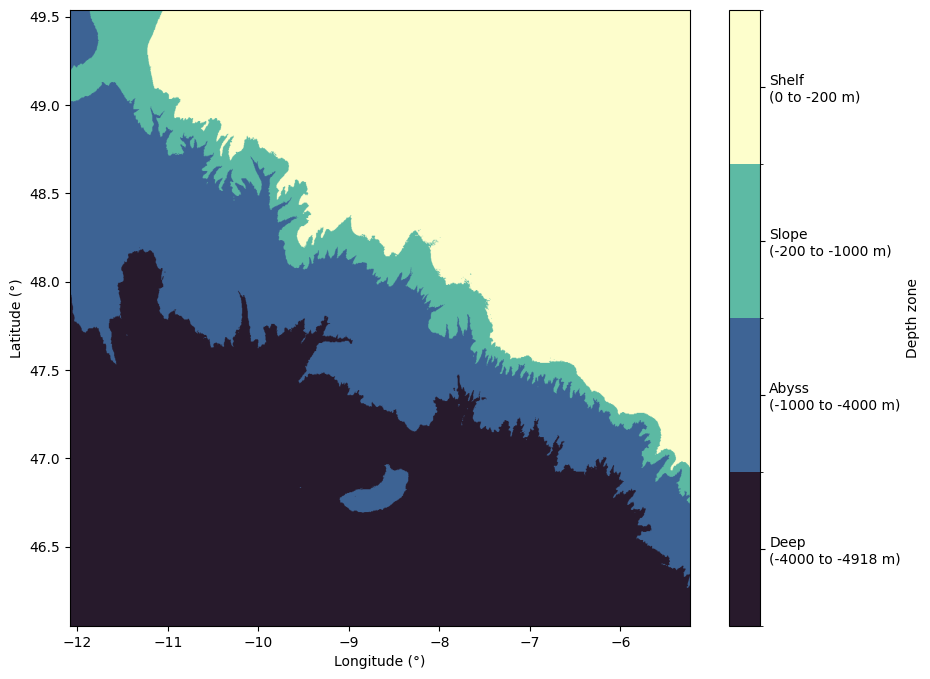

In [10]:
# Depth zones (shelf, slope, abyss)
bath.plot_depth_zones()

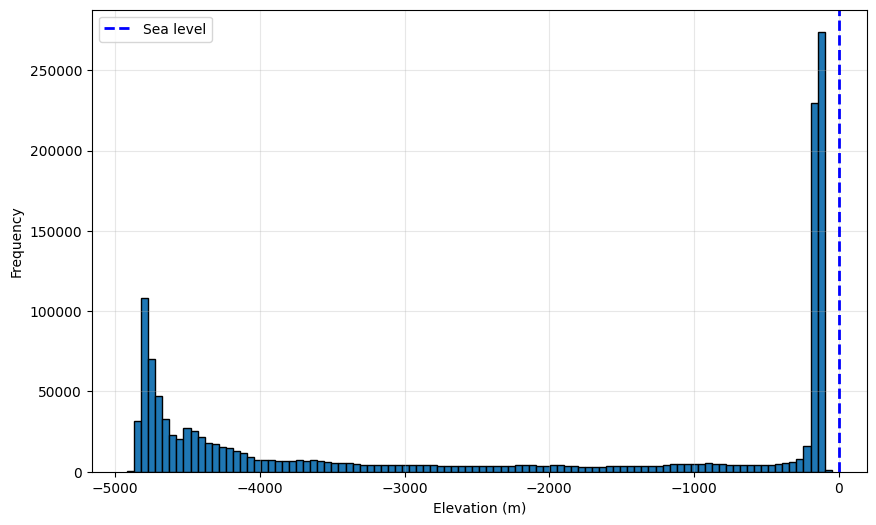

In [11]:
# Elevation histogram
bath.plot_histogram(bins=100)

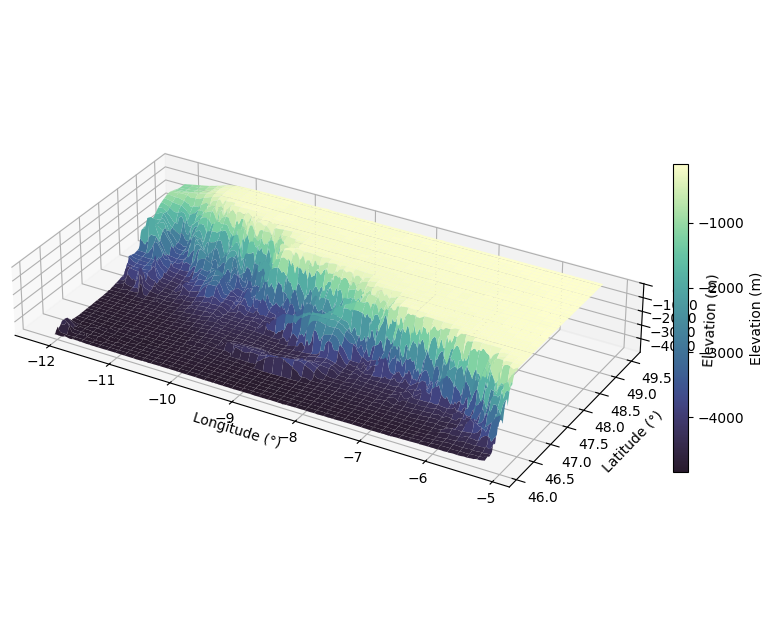

In [12]:
# Simple elevation plot
bath.plot_surface3d(stride=5, vertical_exaggeration=0.2)